# SIMPLE FEED FORWARD NEURAL NETWORK

In [1]:
# importing all the necessary libraries
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

import json

In [4]:
# load dataset
dataset = mnist.load_data()
print(dataset)
print("dataset type: ",type(dataset))
y = np.array(dataset[1][1])
dataset = np.array(dataset[1][0])
#print(dataset)
print("shape of data: ",dataset.shape)
print("It has 10 K records of digits with each digit being represented in a 28X28 array")
print("Y data: ",y.shape)

unique_values,count = np.unique(y,return_counts=True)
print("distribution of y data: ",(unique_values,count))

print("From the distribution we can conclude that the dataset is pretty balanced and that we can proceed with the development of custom neural network for classification")


((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

(10000, 784)
x_train:  (7000, 784)
x_test:  (3000, 784)
y_train:  (7000,)
y_test:  (3000,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0

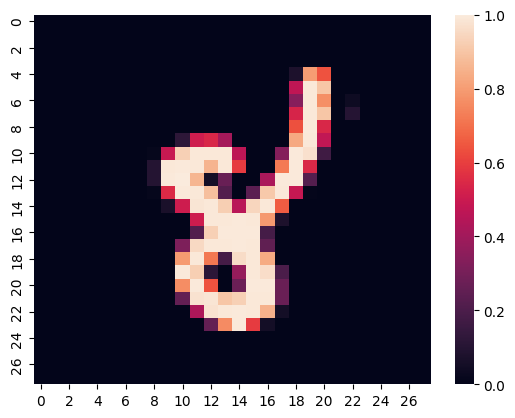

In [15]:
# data preprocessing
x=dataset
x = np.array([np.reshape(x_i,(-1,1)) for x_i in x])
x = np.reshape(x,(-1,784))

print(x.shape)
# data scaling - MinMax scaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(X=x)
# data split into train,test
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state=42,test_size=0.3)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)
print(x_train[1])

# y one hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train = encoder.fit_transform(y_train.reshape(-1,1))

pos = [i for i in np.reshape(x[1],(-1,1)) if i<0]
print(pos)
print(len(pos))

# sample dataset visualization
plt.figure()
sns.heatmap(data=np.reshape(x_train[10],(28,28)))
plt.show()

# NEURAL NETWORK ARCHITECTURE

### ACTIVATION FUNCTIONS

In [10]:
# defining the componenents

class ActivationFunction:
    # Static methods are used because the activation function doesn't depend 
    # on the state of the ActivationFunction class instance.
    
    @staticmethod
    def relu(Z):
        """ReLU Activation: f(Z) = max(0, Z)"""
        return np.maximum(0, Z)

    @staticmethod
    def sigmoid(Z):
        """Sigmoid Activation: f(Z) = 1 / (1 + exp(-Z))"""
        return 1 / (1 + np.exp(-Z))

    @staticmethod
    def softmax(Z):
        """Softmax Activation for output layer probabilities."""
        # Ensure numerical stability
        exp_z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
        return exp_z / np.sum(exp_z, axis=0, keepdims=True)

    def get_activation(self, name: str):
        """Returns the function reference based on the name."""
        name = name.lower()
        if name == "relu":
            return self.relu
        elif name == "sigmoid":
            return self.sigmoid
        elif name == "softmax":
            return self.softmax
        else:
            raise ValueError(f"Unknown activation function: {name}")

### LOSS FUNCTIONS

In [21]:

class LossFunction:
    
    @staticmethod
    def cross_entropy(y_true_onehot, y_pred_probs):
        """Calculates Categorical Cross-Entropy Loss (for classification)."""

        y_true_onehot = y_true_onehot.T
        y_pred_probs = y_pred_probs.T

        print("y_true_onehot: ",y_true_onehot)
        print("y_true shape: ",y_true_onehot.shape)
        print("y_pred_probs: ",y_pred_probs)
        print("y_pred_probs: ",y_pred_probs.shape)
        
        N = y_true_onehot.shape[0]
        y_pred_probs_clipped = np.clip(y_pred_probs, 1e-12, 1.0)
        
        # L = - 1/N * sum(Y_true * log(Y_pred))
        loss = -np.sum(y_true_onehot * np.log(y_pred_probs_clipped)) / N
        return loss

    @staticmethod
    def mean_squared_error(y_true, y_pred):
        """Calculates Mean Squared Error (MSE) Loss (for regression)."""
        
        N = y_true.shape[0]
        # L = 1/2N * sum((Y_pred - Y_true)^2)
        return np.sum((y_pred - y_true)**2) / (2 * N)

    def get_loss(self, name: str):
        """Returns the loss function reference based on the name."""
        name = name.lower()
        if name == "cross_entropy":
            return self.cross_entropy
        elif name == "mse":
            return self.mean_squared_error
        else:
            raise ValueError(f"Unknown loss function: {name}")
        


### ACTIVATION DERIVATVES - USED IN BACKPROPAGATION

In [11]:
class ActivationDerivatives(ActivationFunction):
    """
    Inherits ActivationFunction to easily access Z values if needed, 
    but primarily provides the derivative functions.
    """
    
    @staticmethod
    def relu_derivative(Z):
        """Derivative of ReLU: 1 if Z > 0, 0 otherwise."""
        return (Z > 0).astype(int)

    @staticmethod
    def sigmoid_derivative(A):
        """
        Derivative of Sigmoid: A * (1 - A)
        Requires the activation output (A), not the pre-activation (Z).
        """
        # A = sigmoid(Z)
        return A * (1 - A)

    # Note: Softmax derivative is typically handled by combining it with the 
    # Cross-Entropy loss derivative (dL/dZ = A - Y).

    def get_derivative(self, name: str):
        """Returns the derivative function reference based on the name."""
        name = name.lower()
        if name == "relu":
            return self.relu_derivative
        elif name == "sigmoid":
            return self.sigmoid_derivative
        # Add checks for other derivatives
        else:
            raise ValueError(f"Unknown activation derivative: {name}")


### NETWORK CONSTRUCTOR

In [17]:
# network constructor
class NeuralNetworkInitialser():
    """
    Parent class responsible for defining the network architecture 
    and initializing all weight and bias parameters.
    retuns a trainable network configuration with weights and bias values
    """
    def __init__(self, constructor_configs:dict,training_configs:dict):
        
        self.layer_configs = constructor_configs["layer_configs"]
        self.no_of_layers = len(self.layer_configs)
        self.training_configs = training_configs

        # Dictionary to store all parameters (W1, b1, W2, b2, etc.)
        self.trainable_network =  constructor_configs
        #self.w = {"0":{}}
        #self.b = {"0":{}}
                
        print(f"--- Architecture Constructor Initialized ---")
        print(f"Schema: {self.layer_configs} (Input -> Hidden(s) -> Output)")
        
        self.initialise_and_save()
        
    def _initialize_parameters(self, weight_scale=0.03):
        """
        Initializes weights (W) and biases (b) for all connections.
        Weights are initialized using small random values (Heuristic).
        """
        # Loop runs for the number of connections/computational layers (N-1)
        for layer_no in range(self.no_of_layers - 1):
            
            input_dim = self.layer_configs[layer_no]["neuron_count"]
            output_dim = self.layer_configs[layer_no+1]["neuron_count"]
            #layer_index = i + 1  # 1-based index for parameters (W1, b1, etc.)

            # W shape: (output_dim, input_dim)
            W = np.random.randn(output_dim, input_dim) * weight_scale

            print("weights--sample: ",W[5])
            
            # b shape: (output_dim,)
            b = np.zeros(output_dim)

            #self.w["0"][str(layer_no)] = W
            #self.b["0"][str(layer_no)] = b
            
            print("Bias sample: ",b[:5])

            self.trainable_network["layer_configs"][layer_no][f"weights"] = W.tolist()
            self.trainable_network["layer_configs"][layer_no]["biases"] = b.tolist()
            
            print(f"Layer {layer_no+1} weights and biases: W{layer_no+1} ({W.shape}), b{layer_no+1} ({b.shape})")
            
        print("--- Initialization Complete ---")

    def save_trainable_network(self):
        with open("trainable_network_template.json","w") as f:
            json.dump(self.trainable_network,f,indent=3)

    def initialise_and_save(self):

        self._initialize_parameters()
        self.trainable_network["training_configs"] = self.training_configs
        self.save_trainable_network()
        
        
if __name__=="__main__":

    with open("simulator_input_template.json","r") as f:
        simulator_template = json.load(f)
        print("simulator template loaded successfully")
        network_initialiser = NeuralNetworkInitialser(constructor_configs=simulator_template["constructor_configs"],training_configs=simulator_template["training_configs"])
        

simulator template loaded successfully
--- Architecture Constructor Initialized ---
Schema: [{'neuron_count': 784, 'activation_function': 'none'}, {'neuron_count': 64, 'activation_function': 'relu'}, {'neuron_count': 10, 'activation_function': 'softmax'}] (Input -> Hidden(s) -> Output)
weights--sample:  [-1.28608079e-02 -2.36310946e-02 -3.01791095e-03  3.81154652e-02
  1.00171922e-02 -2.54825368e-03  3.91383730e-02  3.44123591e-02
  7.56302718e-03  1.06664710e-02  2.63088161e-02 -6.00457188e-03
  3.86186452e-02  1.31151005e-02  5.31296062e-02 -3.46927603e-03
  2.48588325e-02  2.37544831e-02 -2.64437398e-02 -7.02153700e-03
 -1.98275639e-03 -1.02017654e-02 -2.12242021e-02  1.59124073e-02
  1.26880535e-02 -2.78501405e-02 -4.66879764e-02  8.90292507e-03
  2.60221792e-02 -5.10659691e-02 -1.57178816e-02 -6.07478413e-02
 -2.12853155e-02 -4.45868176e-03  6.26847298e-03 -1.58754121e-03
 -1.18696823e-02  1.46647976e-02  5.61075975e-03  7.32663470e-02
  5.40573518e-03 -2.91320578e-02 -3.78782344e

### SIMULATOR MODULE

In [ ]:
# Simulation is executed in a modular way with records and history being collected for every layer
# , every epoch and every weight change is monitored

# DATA IS GLOBAL (x_train,x_test,y_train,y_test)
import numpy as np

class NNSgdSimulator(NeuralNetworkInitialser,ActivationDerivatives,LossFunction):
    def __init__(self):
        # Neural Network constructor
        
        with open("simulator_input_template.json","r") as f:
            self.trainable_network = json.load(f)
            self.layer_configs = self.trainable_network["constructor_configs"]["layer_configs"]
            self.loss_function = self.trainable_network["constructor_configs"]["loss_function"]
            self.optimizer = self.trainable_network["constructor_configs"]["optimizer"]
            self.training_configs = self.trainable_network["training_configs"]

        super().__init__(constructor_configs=self.trainable_network["constructor_configs"],training_configs=self.training_configs)
        # Post initialization load the weights and biases into the schema 
        with open("trainable_network_template.json","r") as f:
            self.layer_configs = json.load(f)["layer_configs"]
        self.cache = dict()
        
    def forward_pass(self,X,layer_configs,epoch_count,curr_batch_no):
        """
        Performs forward propagation step through all the layers
        """
        X= X.T
        #self.cache = dict()
        if not epoch_count in self.cache.keys():
            self.cache[epoch_count] = dict()
        if not curr_batch_no in self.cache[epoch_count]:
            self.cache[epoch_count][f"batch_{curr_batch_no}"] = dict()
        self.cache[epoch_count][f"batch_{curr_batch_no}"]["A_0"] = X.tolist()

        # extraction fof weight matrix
        for i in range(0,self.no_of_layers-1):

            print("Current layer index: ",i)

            layer_config = layer_configs[i]
            
            activation_function = layer_configs[i+1]["activation_function"]
            print("activation function loaded: ",activation_function)

            w = np.array(layer_config["weights"])
            print(f"shape of W{i}_{i+1}",w.shape)
            b = np.array(layer_config["biases"])
            print(f"shape of bias",b.shape)
            # X = np.array(X)

            # applying activation function
            # output compliation

            #X = np.reshape(X,(-1,1))
            b = np.reshape(b,(-1,1))
            
            print(f"shape of bias",b.shape)
            print("shape of input: ",X.shape)
            
            Z = w@(X) + b

            # update the state history/cache
            self.cache[epoch_count][f"batch_{curr_batch_no}"][f"w_{i+1}"] = w.tolist()
            self.cache[epoch_count][f"batch_{curr_batch_no}"][f"z_{i+1}"] = Z.tolist()
            
            print("before application of activation function: ",Z.shape)

            print(f"current output after layer {i+1} computation: ",Z)

            # activation function
            act_func = ActivationFunction().get_activation(name=activation_function)
            print("activation function applied: ",act_func)

            print("Z shape: ",Z.shape)
            #Z = np.reshape(Z,(-1,1))
            print("Z shape new: ",Z.shape)
            Z_final = act_func(Z=Z)
            self.cache[epoch_count][f"batch_{curr_batch_no}"][f"A_{i+1}"] = Z_final.tolist()

            print("post application of activation function, The output is :  ",Z_final)

            Z_final_T = Z_final.T
            
            # if its the output layer update it as y_pred in state history
            #if i == 
            #self.cache[""]
            
            # updating the cache/ maintaining state history
            
            X = Z_final
            #print("the updted history is : ",self.cache)
        print("****"*8)
        return X 
        
    
    def compute_loss(self, Y_true , Y_pred,epoch_count,curr_batch_no):

        # Computes the loss and updates the state history/cache
        try:
            print("****"*8) 
            # 1. Retrieve the configured loss function name
            loss_fn = LossFunction().get_loss(name=self.loss_function) 
            print("loss function called: ",loss_fn) 
            loss = loss_fn(Y_true,Y_pred) 

            self.cache[epoch_count][f"batch_{curr_batch_no}"]["loss"] = loss

            print("loss: ",loss)

            print("Self.cache: ",self.cache)
            print("****"*8)
            
        except Exception as e:
            print("An exception occured: ",e)
    
    
    def backpropagate(self, Y_true: np.ndarray, A_L: np.ndarray,epoch_count:int,curr_batch_no) -> dict:
        
        # Performs the backpropagation step to calculate the gradients (dW and db) 
        # for all weight and bias matrices.
        #Args:
         #   Y_true (np.ndarray): True labels (one-hot encoded, shape: N_samples, N_output).
          #  A_L (np.ndarray): The network's final output activations (predictions).
           #                 Shape: (N_samples, N_output).
           # cache (dict): Intermediate values (Z, A) from the forward_pass.
        #Returns:
        #    dict: Gradients {'dW1': dW1, 'db1': db1, ...}

        print("Backpropagation starting")
        bp_history = dict()

        grads = {}
        N_samples = Y_true.shape[0]
        L = self.no_of_layers
        bp_history["grads"] = dict()
        bp_history["N_samples"]=N_samples
        bp_history["L"]=L
        
        Y_T = Y_true.T 
        bp_history["y_true"]=Y_T.tolist()
        print("Y_T: ",Y_T.shape)
        A_L_T = A_L.T # final output
        print("ALT: ",A_L_T.shape)
        bp_history["A_L_T"]=A_L_T.tolist()
        #loss_function = self.training_configs["loss_function"]
        
        
        if self.loss_function.lower() == 'cross_entropy' and self.layer_configs[L-1]["activation_function"].lower() == 'softmax':
            dZ = A_L_T - Y_T
            bp_history["dZ"]=dZ.tolist()

            
        elif self.training_configs["loss_function"].lower() == 'mean_squared_error':
            raise NotImplementedError("MSE backprop requires derivative of output activation (e.g., sigmoid_derivative).")
        else:
            raise NotImplementedError("Backprop initialization for this activation/loss combo is not implemented.")

        # 3. Loop Backward from Layer L down to Layer 1
        
        for l in reversed(range(1, L )):
            bp_history[f"layer_{l}"]=dict()
            print("current layer: ",l)
            
            # --- Gradients for Layer 2 (Parameters: W_2, b_2) ---
            
            A_prev = np.array(self.cache[epoch_count][f"batch_{curr_batch_no}"][f'A_{l-1}']).T # A_{l-1} (Input to this layer, shape: (Input_size, Samples))
            print("A_prev: ",A_prev.shape)
            bp_history["A_prev"]=A_prev.tolist()
            # 3a. Calculate dW_l (Gradient w.r.t Weights)
            # dW_l = (1/N) * dZ_l @ A_{l-1}.T 
            # dW_l shape: (Output_size, Input_size)
            dW = (1 / N_samples) * (dZ @ A_prev)
            print(dW)
            dW_true = [i for i in np.reshape(dW,(-1,1))  if i>0]
            print("dwTRue: ",dW_true)

            bp_history["dW"]=dW.tolist()

            # 3b. Calculate db_l (Gradient w.r.t Biases)
            # db_l = (1/N) * sum(dZ_l, axis=1) (sum along samples)
            # db_l shape: (Output_size,)
            db = (1 / N_samples) * np.sum(dZ, axis=1)
            bp_history["db"]=db.tolist()
            print("db: ",db.shape)

            grads[f'dW{l}'] = dW.tolist()
            grads[f'db{l}'] = db.tolist()
            
            # --- Propagate Gradient to Previous Layer (A_{l-1}) ---
            
            # We only need to compute the backpropagation step dZ_{l-1} if we are not at the input layer
            if l > 1:
                W_current = np.array(self.cache[epoch_count][f"batch_{curr_batch_no}"][f'w_{l}'])
                Z_prev = np.array(self.cache[epoch_count][f"batch_{curr_batch_no}"][f'z_{l-1}']) # Z_{l-1} (Pre-activation of the previous layer)
                activation_name_prev = self.layer_configs[l-1]["activation_function"].lower()
                
                # 3c. Calculate dA_{l-1}
                # dA_{l-1} = W_l.T @ dZ_l 
                # dA_prev shape: (Input_size, Samples)
                dA_prev = W_current.T @ dZ
                
                # 3d. Calculate dZ_{l-1}
                # dZ_{l-1} = dA_{l-1} * g'(Z_{l-1}) (Hadamard product with activation derivative)
                if activation_name_prev == 'relu':
                    dZ = dA_prev * self.relu_derivative(Z_prev) 
                elif activation_name_prev == 'sigmoid':
                    dZ = dA_prev * self.sigmoid_derivative(Z_prev) 
                # Add checks for other derivatives (tanh, etc.)
                else:
                    # This should rarely happen for a hidden layer
                    dZ = dA_prev 
                
        bp_history["grads"]=grads
        with open(r"back_prop_output.json","w") as f:
            json.dump(bp_history,f,indent=3)
        return grads
        
    def train_and_record_history(self):

        # define the params 
        batch_size = self.training_configs["batch_size"]
        learning_rate = self.training_configs["learning_rate"]
        epochs = self.training_configs["epochs"]
        print("batch size: ",batch_size)
        print("learning_rate",learning_rate)
        print("epochs",epochs)

        # training layer wise
        layer_configs = self.trainable_network["layer_configs"]
        print("loaded layer configs: ",layer_configs)

        no_of_batches = int(len(x_train)/batch_size)

        curr_epoch = 1

        while curr_epoch <= epochs:
                
            for i in range(no_of_batches-1):
                print("****"*8)
                print("****"*8)
                batch_data = x_train[i*batch_size:(i+1)*batch_size]
                print("batch_data_shape: ",batch_data.shape)
                print("Batch data going in: ")
                #for data in batch_data: # for every individaul image in MNIST
                # forward pass
                print("data_shape : ",batch_data.shape)
                y_pred = self.forward_pass(X=batch_data,layer_configs=self.layer_configs,epoch_count=curr_epoch,curr_batch_no=i+1) # state gets updted automatically
                # updated history.cache after forward pass
                print(self.cache)                    
                
                # loss computation
                y_true = y_train[i*batch_size:(i+1)*batch_size].T
                
                self.compute_loss(Y_true=y_true,Y_pred=y_pred,epoch_count=curr_epoch,curr_batch_no=i+1)
                #break
                # backpropagation
                grads=self.backpropagate(Y_true=y_true.T,A_L=y_pred.T,epoch_count=curr_epoch,curr_batch_no=i+1)

                # update the weights
                for i in range(0,int(len(grads.keys())/2)):
                    self.layer_configs[i]["weights"] = list(np.array(self.layer_configs[i]["weights"]) - self.training_configs["learning_rate"]*(np.array(grads[f"dW{i+1}"])))
                    self.layer_configs[i]["biases"] = list(np.array(self.layer_configs[i]["biases"]) - self.training_configs["learning_rate"]*(np.array(grads[f"db{i+1}"])))
                    print("weights and biases updated")

                with open("forward_pass_output.json","w") as f:
                    json.dump(self.cache,f,indent=3)
                    
                break
            curr_epoch += 1
        
    #def visualize_and_explain():

    def simulate(self):
        # begin training
        self.train_and_record_history()

# unit testing
simulator = NNSgdSimulator()
simulator.simulate()

# OUTPUT AND PROBABILITY VISUALIZATION

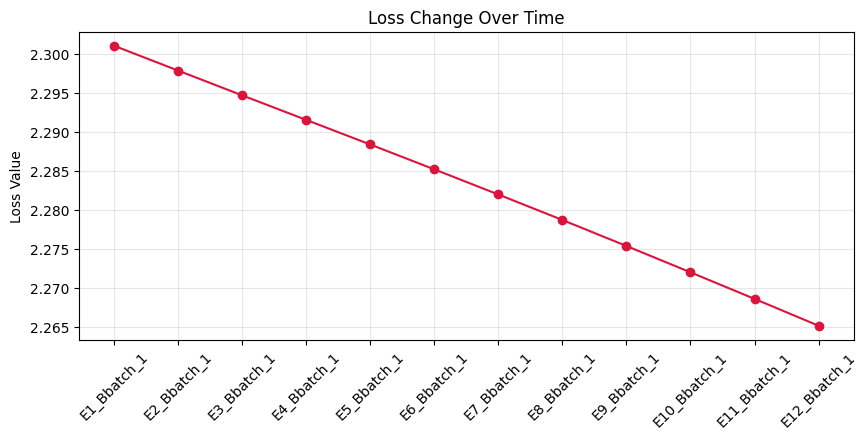

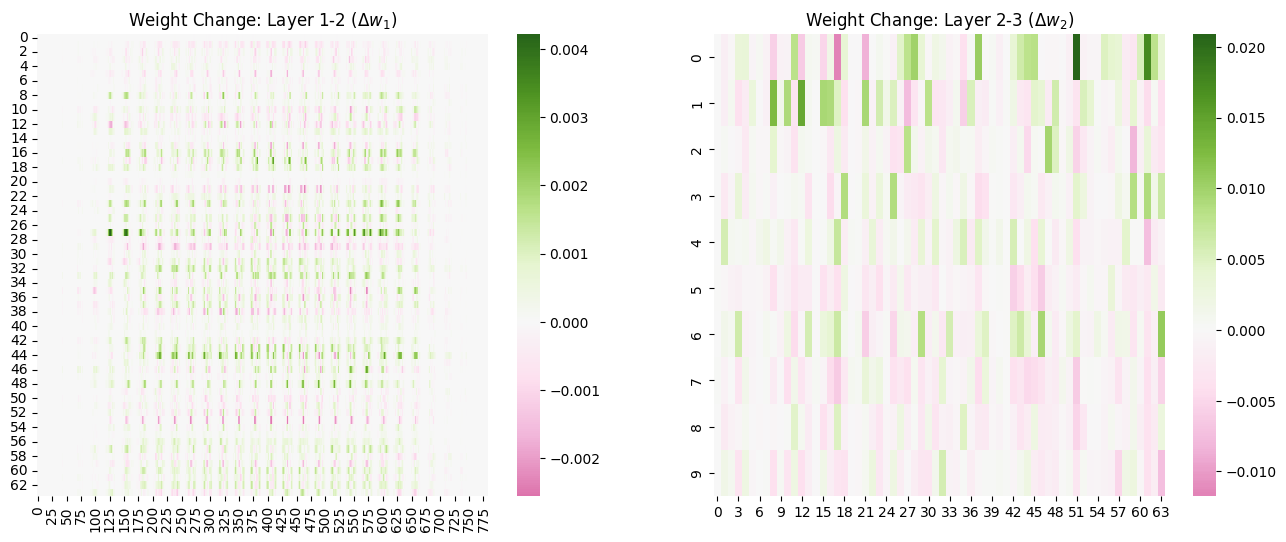

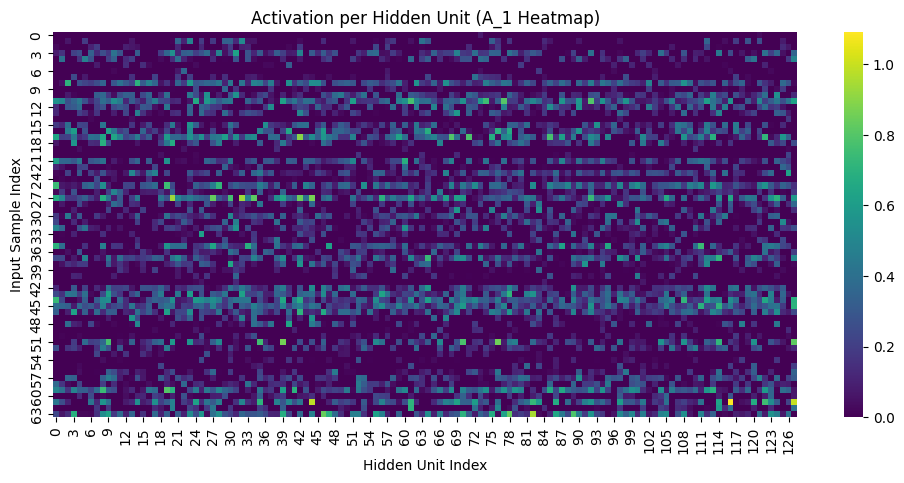

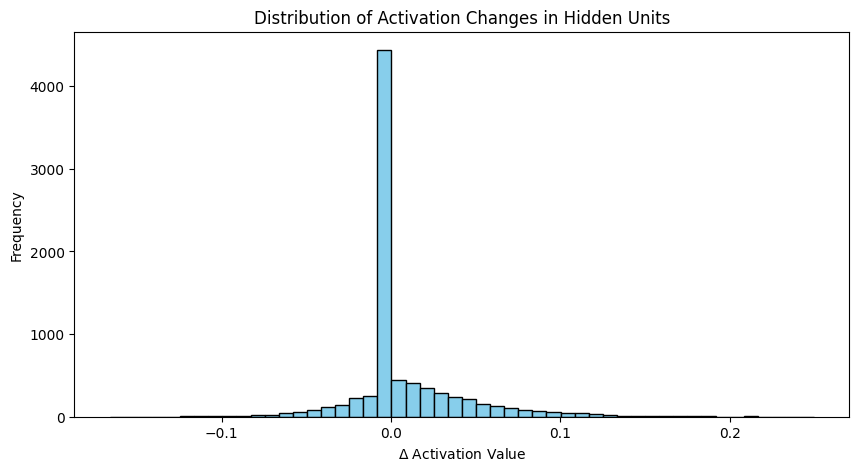

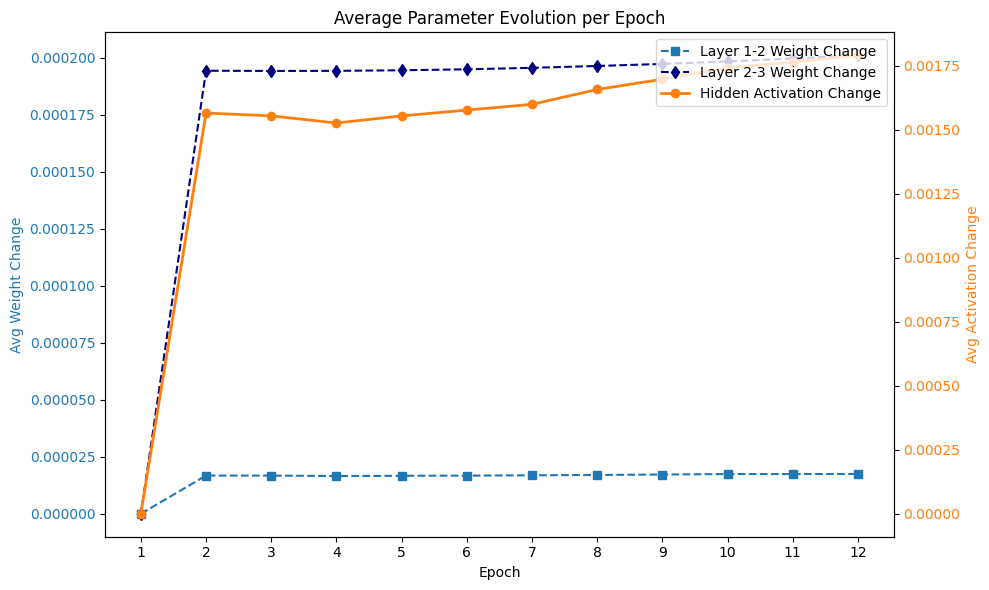

In [26]:

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_training_logs(json_file):
    # 1. Load the data
    with open(json_file, 'r') as f:
        data = json.load(f)

    # Prepare containers for time-series data
    epochs = sorted(data.keys(), key=int)
    all_losses = []
    iterations = []
    
    # We will use the first and last available states to calculate 'change'
    first_epoch, last_epoch = epochs[0], epochs[-1]
    first_batch = list(data[first_epoch].keys())[0]
    last_batch = list(data[last_epoch].keys())[-1]
    
    start_state = data[first_epoch][first_batch]
    end_state = data[last_epoch][last_batch]

    # --- VISUALIZATION 1: Loss Change ---
    for e in epochs:
        for b in sorted(data[e].keys()):
            all_losses.append(data[e][b]['loss'])
            iterations.append(f"E{e}_B{b}")

    plt.figure(figsize=(10, 4))
    plt.plot(iterations, all_losses, marker='o', color='crimson')
    plt.title('Loss Change Over Time')
    plt.ylabel('Loss Value')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.savefig(r'C:\Users\Dhanush Ramachandran\Desktop\Dhanush --\Personal DS\Deep Learning\feed_forward_manual_training_BP_SGD_Viz/loss_change.png')
    plt.show()

    # --- VISUALIZATION 2: Weights Change (Layer 1-2 and 2-3) ---
    # Calculating the delta (difference) between start and end of training
    w1_change = np.array(end_state['w_1']) - np.array(start_state['w_1'])
    w2_change = np.array(end_state['w_2']) - np.array(start_state['w_2'])

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    sns.heatmap(w1_change, cmap='PiYG', center=0, ax=ax[0])
    ax[0].set_title('Weight Change: Layer 1-2 ($\Delta w_1$)')
    sns.heatmap(w2_change, cmap='PiYG', center=0, ax=ax[1])
    ax[1].set_title('Weight Change: Layer 2-3 ($\Delta w_2$)')
    plt.savefig(r'C:\Users\Dhanush Ramachandran\Desktop\Dhanush --\Personal DS\Deep Learning\feed_forward_manual_training_BP_SGD_Viz/weights_change.png')
    plt.show()

    # --- VISUALIZATION 3: Activation per Hidden Unit ---
    # Heatmap of activations for the current batch
    a1 = np.array(end_state['A_1']) # Hidden layer activations
    plt.figure(figsize=(12, 5))
    sns.heatmap(a1, cmap='viridis')
    plt.title('Activation per Hidden Unit (A_1 Heatmap)')
    plt.xlabel('Hidden Unit Index')
    plt.ylabel('Input Sample Index')
    plt.savefig(r'C:\Users\Dhanush Ramachandran\Desktop\Dhanush --\Personal DS\Deep Learning\feed_forward_manual_training_BP_SGD_Viz/activations_heatmap.png')
    plt.show()

    # --- VISUALIZATION 4: Change per Hidden Unit ---
    # Distribution of how much the activations moved
    a1_start = np.array(start_state['A_1'])
    a1_delta = a1 - a1_start
    plt.figure(figsize=(10, 5))
    plt.hist(a1_delta.flatten(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Activation Changes in Hidden Units')
    plt.xlabel('$\Delta$ Activation Value')
    plt.ylabel('Frequency')
    plt.savefig(r'C:\Users\Dhanush Ramachandran\Desktop\Dhanush --\Personal DS\Deep Learning\feed_forward_manual_training_BP_SGD_Viz/activation_delta_hist.png')
    plt.show()

# --- NEW VISUALIZATION 5: Average Change Trends per Epoch ---
    
    avg_w1_changes = []
    avg_w2_changes = []
    avg_a1_changes = []
    
    prev_w1 = None
    prev_w2 = None
    prev_a1 = None

    for e in epochs:
        # 1. Get average state of this epoch by averaging across all its batches
        batches = data[e].keys()
        w1_epoch = np.mean([data[e][b]['w_1'] for b in batches], axis=0)
        w2_epoch = np.mean([data[e][b]['w_2'] for b in batches], axis=0)
        a1_epoch = np.mean([data[e][b]['A_1'] for b in batches], axis=0)

        if prev_w1 is not None:
            # Calculate Mean Absolute Change (L1 Norm)
            avg_w1_changes.append(np.mean(np.abs(w1_epoch - prev_w1)))
            avg_w2_changes.append(np.mean(np.abs(w2_epoch - prev_w2)))
            avg_a1_changes.append(np.mean(np.abs(a1_epoch - prev_a1)))
        else:
            # First epoch has no "previous" to compare to; set to 0 or skip
            avg_w1_changes.append(0)
            avg_w2_changes.append(0)
            avg_a1_changes.append(0)

        prev_w1, prev_w2, prev_a1 = w1_epoch, w2_epoch, a1_epoch

    # Plotting Trends
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Avg Weight Change', color='tab:blue')
    ax1.plot(epochs, avg_w1_changes, label='Layer 1-2 Weight Change', color='tab:blue', linestyle='--', marker='s')
    ax1.plot(epochs, avg_w2_changes, label='Layer 2-3 Weight Change', color='navy', linestyle='--', marker='d')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    

    ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
    ax2.set_ylabel('Avg Activation Change', color='tab:orange')
    ax2.plot(epochs, avg_a1_changes, label='Hidden Activation Change', color='tab:orange', linewidth=2, marker='o')
    ax2.tick_params(axis='y', labelcolor='tab:orange')


    plt.title('Average Parameter Evolution per Epoch')
    fig.tight_layout()
    fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    plt.savefig('epoch_trends.png')
    plt.show()


visualize_training_logs("forward_pass_output.json")
# To run:
# visualize_training_logs('forward_pass_output.json')

# weights change in layer 1-2

# weights change in layer 2-3

# loss change 